In [9]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

# Combine the data into a single dataset

# Display the data table for preview


In [10]:
city_data_df = pd.read_csv("data/city_data.csv")
city_data_df


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [11]:
ride_data_df = pd.read_csv("data/ride_data.csv")
ride_data_df


,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2018-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2018-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2018-04-26 00:43:24,35.98,111953927754
8,South Karenland,2018-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2018-03-09 06:26:29,42.81,5327642267789


In [13]:
#city_data_df = city_data_df.drop_duplicates('city',keep = 'first')
#city_data_df

In [14]:
# Merge our two data frames together
merged_df = pd.merge(city_data_df, ride_data_df, on="city")
merged_df


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850
5,Richardfort,38,Urban,2018-04-21 03:44:04,9.54,3698147103219
6,Richardfort,38,Urban,2018-02-03 00:14:26,29.04,4982665519010
7,Richardfort,38,Urban,2018-02-08 15:50:12,16.55,2270463070874
8,Richardfort,38,Urban,2018-04-03 15:07:34,40.77,9496210735824
9,Richardfort,38,Urban,2018-02-19 14:09:20,27.11,8690324801449


## Bubble Plot of Ride Sharing Data

In [15]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


In [16]:
color_palate = ({'Gold':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral':'#F08080', 'Black':'#060505'})


In [17]:
data_by_city = merged_df.groupby('city')

In [18]:
avg_fare = data_by_city.mean()['fare']


In [104]:
ride_count = data_by_city.count()['ride_id']

In [20]:
driver_count = data_by_city.mean()['driver_count']


In [21]:
city_type = city_data_df.set_index('city')['type']

In [22]:
city_stats_df = pd.DataFrame({"Number of Rides": ride_count,
                          "Average Fare": avg_fare,
                          "Number of Drivers": driver_count,
                              "Type of City": city_type})
city_stats_df                           
                              
                              

,Number of Rides,Average Fare,Number of Drivers,Type of City
Amandaburgh,18,24.641667,12.0,Urban
Barajasview,22,25.332273,26.0,Urban
Barronchester,16,36.422500,11.0,Suburban
Bethanyland,18,32.956111,22.0,Suburban
Bradshawfurt,10,40.064000,7.0,Rural
Brandonfort,19,35.437368,10.0,Suburban
Carriemouth,27,28.314444,52.0,Urban
Christopherfurt,27,24.501852,41.0,Urban
Colemanland,22,30.894545,23.0,Suburban
Davidfurt,17,31.995882,23.0,Suburban


In [ ]:
#OBSERVABLE TRENDS:

# One would expect that to identify someone as a driver, that that person
#would actually be driving; that each driver would be producing multiple
#rides, so that the number of drivers would be less than the total number of
#rides such as one might find in a taxi business. The opposite is happening
#which demonstrates the nature of this buisiness model.  Pyber drivers,
#while listed as an available driver is not actually working. This makes more 
#drivers immediately available whenever there is a need.

In [24]:
#show separate df's for type of city
rural_df = city_stats_df[city_stats_df['Type of City'] == 'Rural']
suburban_df = city_stats_df[city_stats_df['Type of City'] == 'Suburban']
urban_df = city_stats_df[city_stats_df['Type of City'] == 'Urban']
#rural_df
#suburban_df
#urban_df

In [25]:
percity_color = {'Urban': color_palate['Gold'], 'Suburban': color_palate['Light Sky Blue'], 'Rural': color_palate['Light Coral']}
plt.suptitle('Pyber Ride Sharing Data')
                                                                         
                                                                         
                                                                         

Text(0.5, 0.98, 'Pyber Ride Sharing Data')

<Figure size 432x288 with 0 Axes>

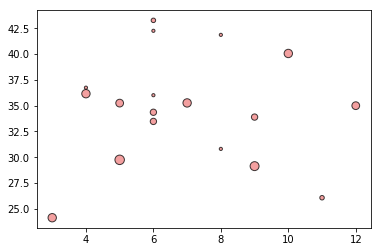

In [26]:
# get bubbly
plt_rural = plt.scatter(rural_df['Number of Rides'], rural_df['Average Fare'],
rural_df['Number of Drivers']*10, color = percity_color['Rural'],
edgecolor = 'Black', label='Rural',alpha = .75)
plt.show()

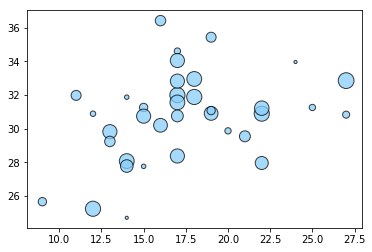

In [27]:
plt_suburban = plt.scatter(suburban_df['Number of Rides'], suburban_df['Average Fare'],
suburban_df['Number of Drivers']*10, color = percity_color['Suburban'],
edgecolor = 'Black', label='Suburban',alpha = .75)
plt.show()

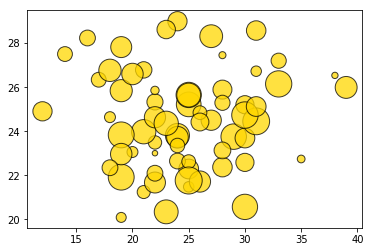

In [28]:
plt_urban = plt.scatter(urban_df['Number of Rides'], urban_df['Average Fare'],
urban_df['Number of Drivers']*10, color = percity_color['Urban'],
edgecolor = 'Black', label='Urban',alpha = .75)
plt.show()

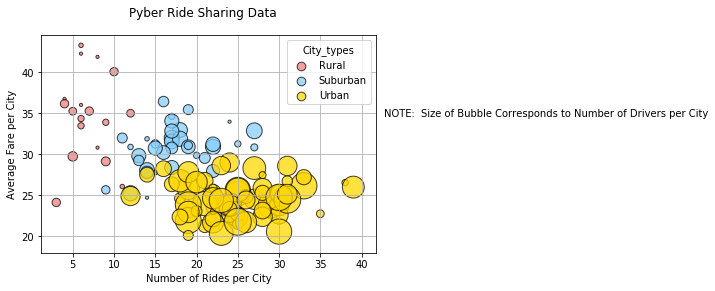

In [40]:
plt_rural = plt.scatter(rural_df['Number of Rides'], rural_df['Average Fare'],
rural_df['Number of Drivers']*10, color = percity_color['Rural'],
edgecolor = 'Black', label='Rural',alpha = .75)
#plt.show()

plt_suburban = plt.scatter(suburban_df['Number of Rides'], suburban_df['Average Fare'],
suburban_df['Number of Drivers']*10, color = percity_color['Suburban'],
edgecolor = 'Black', label='Suburban',alpha = .75)
#plt.show()

plt_urban = plt.scatter(urban_df['Number of Rides'], urban_df['Average Fare'],
urban_df['Number of Drivers']*10, color = percity_color['Urban'],
edgecolor = 'Black', label='Urban',alpha = .75)

plt.suptitle('Pyber Ride Sharing Data')
side_note=('NOTE:  Size of Bubble Corresponds to Number of Drivers per City')
plt.gcf().text(0.92,0.6,side_note,fontsize=10)
plt.xlabel('Number of Rides per City')
plt.ylabel('Average Fare per City')

legend=plt.legend(title="City_types",loc="best")
legend.legendHandles[0]._sizes =[75]
legend.legendHandles[1]._sizes =[75]
legend.legendHandles[2]._sizes =[75]
plt.grid()


plt.show()


## Total Fares by City Type

In [ ]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure


In [91]:
merged_df = pd.merge(city_data_df, ride_data_df, on="city")
#merged_df

all_fares_tot = merged_df['fare'].sum()
all_fares_tot

63538.64

In [59]:
#tot_fare = data_by_city.sum()['fare']

fares_by_type = merged_df.groupby('type')['type','fare','ride_id','driver_count']
fare_tot = fares_by_type.sum()['fare']


fare_tot

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

Text(0.5, 1.0, '% of Total Fares per City Type')

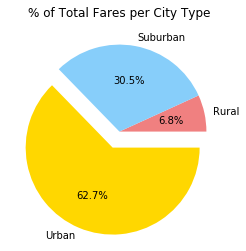

In [90]:
avg_fare_by_type = (fare_tot/all_fares_tot)*100
avg_fare_by_type
plt.pie(avg_fare_by_type, explode=[0,0,.2],labels=('Rural','Suburban','Urban'), colors = ['LightCoral','LightSkyBlue','Gold'],autopct='%.1f%%')
plt.title("% of Total Fares per City Type")

## Total Rides by City Type

In [124]:
# Calculate Ride Percents
merged_df = pd.merge(city_data_df, ride_data_df, on="city")
#merged_df

total_rides = merged_df['ride_id'].count()
total_rides
# Build Pie Chart

# Save Figure


2375

In [119]:
rides_by_type = merged_df.groupby('type')['type','fare','ride_id','driver_count']
rides_tot = rides_by_type.count()['ride_id']
rides_tot

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

Text(0.5, 1.0, '% of Total Rides per City Type')

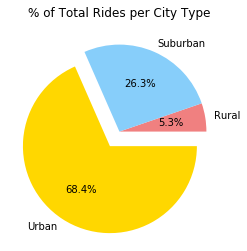

In [145]:
avg_rides_by_type = (rides_tot/total_rides)*100
avg_rides_by_type
plt.pie(avg_rides_by_type, explode=[0,0,.2],labels=('Rural','Suburban','Urban'), colors = ['LightCoral','LightSkyBlue','Gold'],autopct='%.1f%%')
plt.title("% of Total Rides per City Type")

In [109]:
# OBSERVABLE TRENDS:
#  The percentage of total rides by city type is certainly no 
#surprise and does not provide much unexpected information.  This
#result would be expected due to the obvious impact of the general
#population.  There are many more available customers in urban cities
#than any other, and more in suburban areas than in rural areas.
#Congestion in large cities would certainly make the use of on-call
#rivers appealing.

## Total Drivers by City Type

In [205]:
# Calculate Driver Percents
merged_df = pd.merge(city_data_df, ride_data_df, on="city")
driver_count = merged_df.groupby('city')
#tot_drivers = driver_count['driver_count'].unique().sum()
#tot_drivers[0]
# Build Pie Charts

# Save Figure


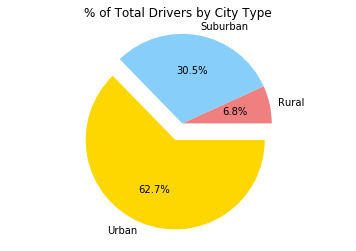

In [206]:
driver_sum = driver_count.sum()['driver_count']

plt.pie(avg_fare_by_type, explode=[0,0,.2],labels=('Rural','Suburban','Urban'), colors = ['LightCoral','LightSkyBlue','Gold'],autopct='%.1f%%')
plt.title('% of Total Drivers by City Type')
plt.axis('equal')
plt.show()

In [ ]:
#OBSERVABLE TRENDS:
    #There is an interesting twist to the data; not in
#the data itself, but in the comparison between the
#two pie charts; rides by city and drivers by city. 
#Within the population of available drivers observed
#everywhere,there is a shift in the percentage of
#drivers available in urban areas as compared to the 
#percentage of rides provided between the various city
#types of over 5 1/2 percent.  the majority of this
#percentage shift is absorbed by the suburban areas.
#One might hypothesize that the shift could be the
#result of greater availability of public transporation
#in the urban cities than in the other areas.  It would
#be interesting to test the public transportation
#ridership over time; before the rise of "Pyber" type
#businesses and after their acceptance.  It might also be interesting to consider the rate of vehicle sales compared to the rate of "Pyber"
#type ridership over time.
